# Unsupervised Clustering of Iris data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#Get-Iris-data" data-toc-modified-id="Get-Iris-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get Iris data</a></span></li><li><span><a href="#Explore-data" data-toc-modified-id="Explore-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore data</a></span></li><li><span><a href="#Reporting-functions" data-toc-modified-id="Reporting-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reporting functions</a></span></li><li><span><a href="#Transform-Iris" data-toc-modified-id="Transform-Iris-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Transform Iris</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#K-Means-clustering" data-toc-modified-id="K-Means-clustering-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>K-Means clustering</a></span><ul class="toc-item"><li><span><a href="#Select-K---using-elbow-technique" data-toc-modified-id="Select-K---using-elbow-technique-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Select K - using elbow technique</a></span></li><li><span><a href="#Cluster-with-selected-K" data-toc-modified-id="Cluster-with-selected-K-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Cluster with selected K</a></span></li></ul></li><li><span><a href="#K-Medoids-clustering" data-toc-modified-id="K-Medoids-clustering-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>K-Medoids clustering</a></span></li><li><span><a href="#Fuzzy-C-Means-(FCM)-Clustering" data-toc-modified-id="Fuzzy-C-Means-(FCM)-Clustering-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Fuzzy C-Means (FCM) Clustering</a></span><ul class="toc-item"><li><span><a href="#Using-fcmeans" data-toc-modified-id="Using-fcmeans-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Using fcmeans</a></span></li><li><span><a href="#Using-skfuzzy" data-toc-modified-id="Using-skfuzzy-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Using skfuzzy</a></span></li></ul></li><li><span><a href="#Gaussian-Mixture-Models" data-toc-modified-id="Gaussian-Mixture-Models-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Gaussian Mixture Models</a></span></li><li><span><a href="#Agglomerative-Hierarchical-Clustering" data-toc-modified-id="Agglomerative-Hierarchical-Clustering-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Agglomerative Hierarchical Clustering</a></span></li><li><span><a href="#Affinity-propagation-clustering" data-toc-modified-id="Affinity-propagation-clustering-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Affinity propagation clustering</a></span></li><li><span><a href="#DBSCAN-(Density-Based-Spatial-Clustering)" data-toc-modified-id="DBSCAN-(Density-Based-Spatial-Clustering)-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>DBSCAN (Density-Based Spatial Clustering)</a></span></li><li><span><a href="#Mean-shift" data-toc-modified-id="Mean-shift-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Mean shift</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## imports

In [1]:
# analytical tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get Iris data

In [2]:
from sklearn.datasets import load_iris 
bunch = load_iris()
type(bunch)

sklearn.utils.Bunch

In [3]:
bunch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
bunch['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data = pd.DataFrame(bunch['data'])
data.columns = bunch['feature_names']
data['variety'] = bunch['target']
data['variety_name'] = (
    pd.Series(bunch['target'])
    .map(lambda x: bunch['target_names'][x])
)
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety,variety_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


## Explore data

In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# quick overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   variety            150 non-null    int64  
 5   variety_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.groupby('variety_name').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
variety_name,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


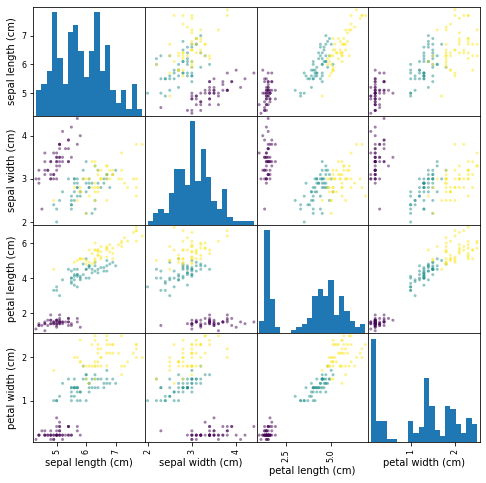

In [9]:
# SPLOM plot
_ = pd.plotting.scatter_matrix(data[data.columns[0:4]],
    c=data['variety'],
    hist_kwds = { 'bins' : 20 }, 
    figsize=(8,8),
)

## Reporting functions

In [10]:
def amalgumate_like_rows(m, clust_label):
    ROW = 0
    COL = 1
    
    # amalgumate like rows
    shape = m.shape
    keep = {}
    for row in range(shape[ROW]):
        if (rType := tuple(m.iloc[row].eq(0))) in keep:
            # change tabulation
            m.iloc[keep[rType]] += m.iloc[row]
            m.iloc[row] = 0
            # fix cluster allocation
            old_label = m.index[row]
            new_label = keep[rType]
            clust_label[clust_label == old_label] = new_label
        else:
            keep[rType] = row
    m = m.loc[m.sum(axis=1) != 0] # delete zero rows
            
    return m, clust_label

In [11]:
def plot_comparative(data_points, orig_label, clust_label):
    crosstab = pd.crosstab(clust_label, orig_label)
    display(crosstab)

    # plot found clusters using petal size
    fig, ax = plt.subplots(1, 1)
    ax.scatter(x=data_points[:, 0], y=data_points[:, 1], 
                c=clust_label, s=40, cmap='viridis', 
                alpha=0.5)
    plt.show()
    plt.close('all')

## Transform Iris

In [12]:
x = data[data.columns[0:4]].to_numpy()
y = data['variety'] # technically not a target, but
                    # an interesting counterpoint

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x_scaled = MinMaxScaler().fit_transform(x) # scales from 0 to 1
x_normal = StandardScaler().fit_transform(x)

In [14]:
# checking
print(type(x), type(x_scaled), type(x_normal))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [15]:
# checking
print(x.shape, x_scaled.shape, x_normal.shape)

(150, 4) (150, 4) (150, 4)


## Clustering

### K-Means clustering
* Start with randomly selected k centroids (or use k
  different points from the original data). 
* Identify the nearest points to each centroid, 
  and calculate a new set of centroids
* Repeat this last step until no change in the centroids.
* Analogous to creating Voronoi diagrams (in multi-dimensional 
  space)
* Tends to cluster in relatively equal sized clusters
* Often best to scale features so that Euclidean distances 
  are not driven by scale
* Can be problematic if the clusters have different degrees of 
  dispersion (variance). Also not good for non-globular clusters
  (elongated clusters). 

In [16]:
from sklearn.cluster import KMeans

#### Select K - using elbow technique
Identify the elbow (sharpest turning point) in the plot

In [17]:
sse = {}
for k in range(1, 11):
    knn = KMeans(n_clusters=k)
    knn.fit(x_scaled)
    sse[k] = knn.inertia_

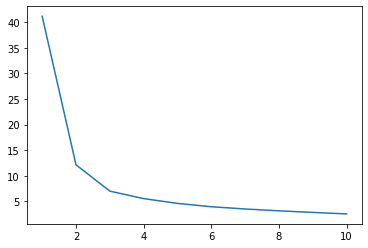

In [18]:
pd.Series(sse).plot()
plt.show()
plt.close('all')
# arguably, the elbow is at 2 or 3
# let's select 3

#### Cluster with selected K

Centroids


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053



Predicted clusters compared with varieties


variety,0,1,2
row_0,,,
0,50,0,0
1,0,48,14
2,0,2,36


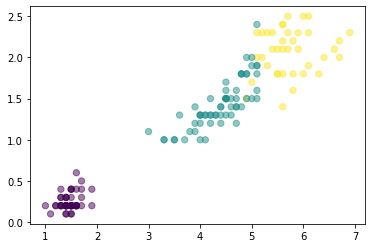

In [19]:
K = 3
DATA = x
km = KMeans(n_clusters=K)            # model
km.fit(DATA)                       # fit

print(f'Centroids')
centroids = pd.DataFrame(km.cluster_centers_,
                         columns=data.columns[0:4])
display(centroids)

print(f'\nPredicted clusters compared with varieties')
predictions = km.predict(DATA)      # predict

plot_comparative(DATA[:, 2:4], y, predictions)

### K-Medoids clustering
* In contrast to the k-means algorithm, k-medoids chooses 
  datapoints as centers (medoids or exemplars). A medoid of a 
  finite dataset is a data point from this set, whose average 
  dissimilarity to all the data points is minimal
* K-means attempts to minimize the total squared error, while 
  k-medoids minimizes the sum of dissimilarities between points 
  labeled to be in a cluster and a point designated as the center 
  of that cluster. 
* This makes it less susceptible to outliers, compared with 
  k-means

Medoids:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.194444,0.583333,0.084746,0.041667
1,0.361111,0.291667,0.542373,0.500000
2,0.611111,0.416667,0.711864,0.791667



Comparison with varieties


variety,0,1,2
row_0,,,
0,50,0,0
1,0,38,3
2,0,12,47


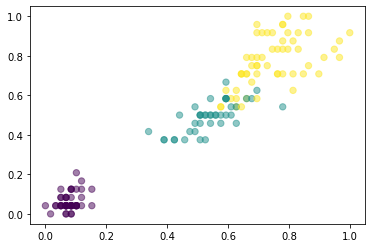

In [20]:
# conda install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
K = 3
DATA = x_scaled
km = KMedoids(n_clusters=K)            # model
km.fit(DATA)                           # fit

medoids = pd.DataFrame(km.cluster_centers_,
                         columns=data.columns[0:4])
print('Medoids:')
display(medoids)

print('\nComparison with varieties')
predictions = km.predict(DATA)      # predict

plot_comparative(DATA[:, 2:4], y, predictions)


### Fuzzy C-Means (FCM) Clustering
* conceptually similar to K-Means, with the exception that cluster
  membership is non-binary. 
* difference is that each point has a relationship with
  all of the putative centroids, not just the closest. 

#### Using fcmeans

Centroids
 [[0.43626618 0.30819    0.5668358  0.5297866 ]
 [0.67744213 0.4412781  0.7752393  0.8115236 ]
 [0.19570585 0.5897426  0.08256607 0.06384466]]


variety,0,1,2
row_0,,,
0,0,46,12
1,0,4,38
2,50,0,0


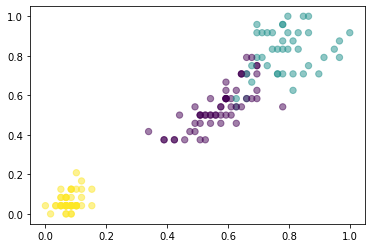

In [21]:
from fcmeans import FCM # pip install fuzzy-c-means
DATA = x_scaled
fcm = FCM(n_clusters=3)
fcm.fit(DATA)

print('Centroids\n',fcm.centers)

predictions = fcm.predict(DATA)

plot_comparative(DATA[:, 2:4], y, np.array(predictions))

#### Using skfuzzy

Using skfuzzy version 0.4.2
Centroids
[[0.43626234 0.30818759 0.56683258 0.52978263]
 [0.19570592 0.58974307 0.08256594 0.06384451]
 [0.67743855 0.44127626 0.77523652 0.81151971]]

Predictions


variety,0,1,2
row_0,,,
0,0,46,12
1,50,0,0
2,0,4,38


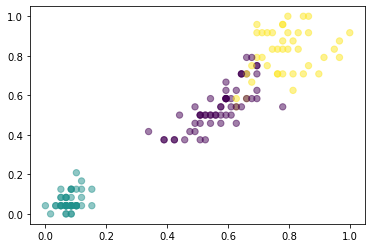

In [22]:
import skfuzzy as fuzz # conda install scikit-fuzzy
print(f'Using skfuzzy version {fuzz.__version__}')
# https://pypi.org/project/scikit-fuzzy/
# https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html#cmeans

C = 3
DATA = x_scaled
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    # note transpose for matrix input!
    data=DATA.T, c=C, m=2, error=0.0001, maxiter=1000
)
print(f'Centroids\n{cntr}')
print('\nPredictions')
cluster = u.argmax(axis=0)

plot_comparative(DATA[:, 2:4], y, cluster)


### Gaussian Mixture Models
* The GMM approach is very similar to k-means (and GMM is a generalization of k-means)
* In 2D, k-means envisions a circle around each centroid (in multiple dimensions, a hyper-sphere around each centroid). This is problematic if the clusters are not typically circular. 
* GMM envisions a Gaussian probability distribution around each centroid. In 2D, the contours of each distribution is elliptical.

Converged: True
Iterations: 13
Model means:
 [[0.4490692  0.32417934 0.5431763  0.49925811]
 [0.19611111 0.595      0.07830508 0.06083333]
 [0.62393654 0.39555114 0.75983572 0.78619009]]


variety,0,1,2
row_0,,,
0,0,45,0
1,50,0,0
2,0,5,50


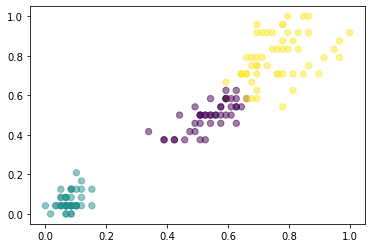

In [23]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(x_scaled)
print(f'Converged: {gmm.converged_}')
print(f'Iterations: {gmm.n_iter_}')
print('Model means:\n', gmm.means_)
labels = gmm.predict(x_scaled)

plot_comparative(DATA[:, 2:4], y, labels)


### Agglomerative Hierarchical Clustering
* A bottom up approach
* Start with each data point as its own cluster
* Iteratively merge the pair of clusters that minimally 
  increases a given linkage distance
* Stop when we have the desired number of clusters
* Note: the different ways of calculating the linkage distance       can yield dramatically different results. 
* Limitations: space and time complexity


ward


variety,0,1,2
row_0,,,
0,0,50,17
1,50,0,0
2,0,0,33


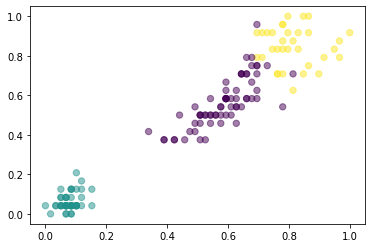


complete


variety,0,1,2
row_0,,,
0,50,0,0
1,0,1,33
2,0,49,17


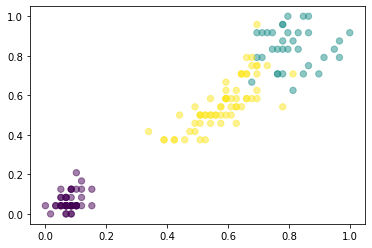


average


variety,0,1,2
row_0,,,
0,50,0,0
1,0,50,17
2,0,0,33


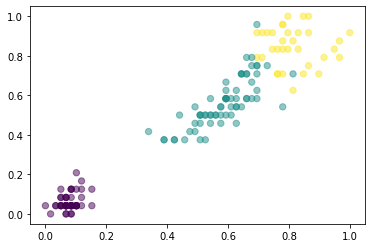


single


variety,0,1,2
row_0,,,
0,0,50,50
1,1,0,0
2,49,0,0


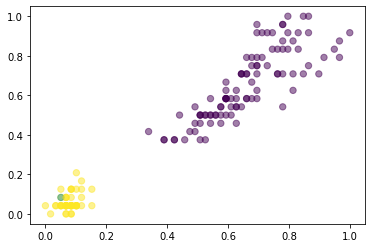

In [24]:
from sklearn.cluster import AgglomerativeClustering
K = 3
linkages = ['ward', 'complete', 'average', 'single']
for linkage in linkages:
    print(f'\n{linkage}')
    ac = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    prediction = ac.fit_predict(x_scaled)
    
    plot_comparative(DATA[:, 2:4], y, prediction)

### Affinity propagation clustering
* Each data point sends a message to other data points indicating 
  attractiveness of that data point's attractiveness. 
* Each data responds to the message indicating availability to 
  associate, given the messages it has received.
* The message passing continues until a consensus is reached.
* Benefits: does not require the number of clusters to be 
  specified

variety,0,1,2
row_0,,,
0,18,0,0
1,11,0,0
2,21,0,0
3,0,10,0
4,0,7,16
5,0,13,3
6,0,20,1
7,0,0,9
8,0,0,21


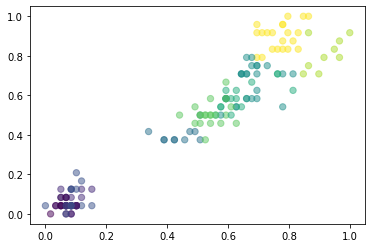

In [25]:
from sklearn.cluster import AffinityPropagation

DATA = x_scaled
ap = AffinityPropagation(random_state=0)
prediction = ap.fit_predict(DATA)

plot_comparative(DATA[:, 2:4], y, ap.labels_)

### DBSCAN (Density-Based Spatial Clustering)


variety,0,1,2
row_0,,,
-1,13,36,40
0,37,0,0
1,0,14,0
2,0,0,10


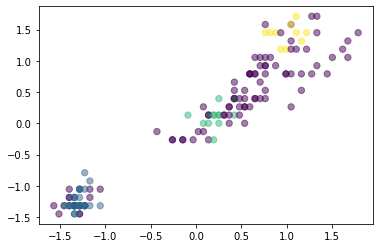

In [26]:
DATA = x_normal

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(DATA)
# eps = the maximum distance between two samples for 
#       one to be considered as in the neighborhood 
#       of the other
# min_samples = The number of samples (or total weight) 
#       in a neighborhood for a point to be considered 
#       as a core point. This includes the point itself.
plot_comparative(DATA[:, 2:4], y, db.labels_)


### Mean shift
* This algorithm applies a Kernel Density Estimate (KDE) to the 
  the data. This will give us a surface with peaks 
  where there are many data points.
* the bandwidth is very important (in the context of the scale of 
  the data) - as this will define the number of peaks/clusters 
  found. Too small and every point will be its own peak. Too 
  broad, and and there will only be one peak
* the algorithm works by slowly moving the points in the data to 
  its nearest peak as defined by the KDE from the original points 
  (think hill climbing). 

variety,0,1,2
row_0,,,
0,0,50,31
1,50,0,0
2,0,0,19


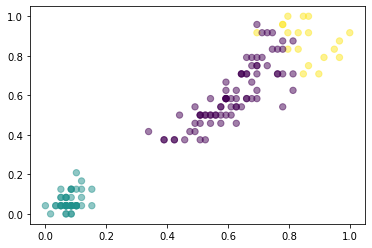

In [27]:
from sklearn.cluster import MeanShift, estimate_bandwidth

DATA = x_scaled
bandwidth = estimate_bandwidth(DATA, 
                               quantile=0.19, 
                               n_samples=150)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=False)
ms.fit(DATA)

plot_comparative(DATA[:, 2:4], y, ms.labels_)

## Conclusion

In [28]:
print('Finished')

Finished
